# Dataset Overview:

Name: House Sales Prediction in King County, USA (from Kaggle)

Description: This dataset contains details about house sales in King County, which includes columns such as:
- id: A unique identifier for each sale
- date: The date of the sale
- price: The sale price of the house (target variable)
- bedrooms: Number of bedrooms
- bathrooms: Number of bathrooms
- sqft_living: Square footage of the living space
- sqft_lot: Square footage of the lot
- floors: Number of floors
- waterfront: Whether the house is waterfront or not
- view: Quality of the view (scale 0-4)
- condition: Condition of the house (scale 1-5)
- grade: Overall grade of the house (scale 1-13)
- sqft_above: Square footage of the house excluding the basement
- sqft_basement: Square footage of the basement
- yr_built: Year the house was built
- yr_renovated: Year the house was renovated (if applicable)
- zipcode: Zip code where the house is located
- lat: Latitude of the house
- long: Longitude of the house
- sqft_living15: Living room area in the nearest 15 neighbors
- sqft_lot15: Lot size of the nearest 15 neighbors

Motivation: This is a real-world regression problem, which involves predicting the house price based on multiple features. The dataset is relatively simple but still presents a challenge due to the number of features and the potential for complex relationships between them. We will use this dataset to train a neural network to predict house prices based on these features.

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df_original = pd.read_csv("kc_house_data.csv")
df = df_original.copy()

In [91]:
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [92]:
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


# Sigmoid and ReLU Layers (Regresssion NN)

In [93]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 
            'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 
            'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

X = df[features].values
y = df['price'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Sigmoid Activation Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Sigmoid Derivative Function
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# ReLU Activation Function
def relu(x):
    return np.maximum(0, x)

# ReLU Derivative Function
def relu_derivative(x):
    return (x > 0).astype(float)

def mse_loss(predictions, targets):
    return np.mean((predictions - targets) ** 2)

# Adam Optimizer
class AdamOptimizer:
    def __init__(self, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = None
        self.v = None
        self.t = 0
    
    def update(self, grads, params):
        self.t += 1
        if self.m is None:
            self.m = {key: np.zeros_like(val) for key, val in params.items()}
            self.v = {key: np.zeros_like(val) for key, val in params.items()}
        
        for key in params:
            self.m[key] = self.beta1 * self.m[key] + (1 - self.beta1) * grads[key]
            self.v[key] = self.beta2 * self.v[key] + (1 - self.beta2) * grads[key]**2
            
            m_hat = self.m[key] / (1 - self.beta1**self.t)
            v_hat = self.v[key] / (1 - self.beta2**self.t)
            
            params[key] -= self.learning_rate * m_hat / (np.sqrt(v_hat) + self.epsilon)

# Neural Network Class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        
        # He initialization for ReLU
        self.W1 = np.random.randn(input_size, hidden_size1) * np.sqrt(2. / input_size)
        self.b1 = np.zeros((1, hidden_size1))  # Bias for first hidden layer
        
        self.W2 = np.random.randn(hidden_size1, hidden_size2) * np.sqrt(2. / hidden_size1)
        self.b2 = np.zeros((1, hidden_size2))  # Bias for second hidden layer
        
        self.W3 = np.random.randn(hidden_size2, output_size) * np.sqrt(2. / hidden_size2)
        self.b3 = np.zeros((1, output_size))  # Bias for output layer

        # Initialize Adam optimizer
        self.optimizer = AdamOptimizer(learning_rate=0.001)
    
    def forward(self, X):
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = relu(self.Z1)
        
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = relu(self.Z2)
        
        self.Z3 = np.dot(self.A2, self.W3) + self.b3
        self.A3 = self.Z3  # Linear output for regression
        return self.A3
    
    def backward(self, X, y, learning_rate=0.0001, lambda_reg=0.01):
        m = X.shape[0]
        
        # Compute the gradients for the output layer
        dZ3 = self.A3 - y
        dW3 = np.dot(self.A2.T, dZ3) / m
        db3 = np.sum(dZ3, axis=0, keepdims=True) / m
        
        # Compute the gradients for the second hidden layer
        dA2 = np.dot(dZ3, self.W3.T)
        dZ2 = dA2 * relu_derivative(self.Z2)
        dW2 = np.dot(self.A1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m
        
        # Compute the gradients for the first hidden layer
        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * relu_derivative(self.Z1)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        # Update weights with Adam optimizer
        grads = {
            'W1': dW1 + lambda_reg * self.W1,
            'W2': dW2 + lambda_reg * self.W2,
            'W3': dW3 + lambda_reg * self.W3,
            'b1': db1,
            'b2': db2,
            'b3': db3
        }
        
        params = {
            'W1': self.W1,
            'W2': self.W2,
            'W3': self.W3,
            'b1': self.b1,
            'b2': self.b2,
            'b3': self.b3
        }

        # Update parameters with Adam optimizer
        self.optimizer.update(grads, params)

        # Update model parameters
        self.W1 = params['W1']
        self.W2 = params['W2']
        self.W3 = params['W3']
        self.b1 = params['b1']
        self.b2 = params['b2']
        self.b3 = params['b3']

    def train(self, X, y, epochs=500):
        for epoch in range(epochs):
            self.forward(X)
            self.backward(X, y)
            if epoch % 10 == 0:
                loss = mse_loss(self.A3, y)
                print(f"Epoch {epoch}, Loss: {loss}")

# Initialize and train the neural network with Adam
nn = NeuralNetwork(input_size=X_train.shape[1], hidden_size1=128, hidden_size2=64, output_size=1)
nn.train(X_train, y_train, epochs=100)

# Make predictions on the test set
predictions_scaled = nn.forward(X_test)

# Inverse scale the predictions
predictions = y_scaler.inverse_transform(predictions_scaled)

# Convert y_test back to original scale
y_test_original = y_scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate MSE in original scale
mse = np.mean((predictions - y_test_original)**2)
print("\nTest MSE:", mse)

# Calculate MSE with scaled values
mse_scaled = np.mean((predictions_scaled - y_test.reshape(-1, 1))**2)
print("\nMSE on Scaled Data:", mse_scaled)

rmse = np.sqrt(mse)
print("\nTest RMSE:", rmse)

# Compare predictions and true values (first 10 examples)
print("\nPredictions vs True Values (First 10):")
print(np.hstack((predictions[:10], y_test_original[:10])))


Epoch 0, Loss: 3.7217203593296073
Epoch 10, Loss: 0.7668199611888703
Epoch 20, Loss: 0.5119193386731762
Epoch 30, Loss: 0.37829394111934705
Epoch 40, Loss: 0.32328681589114655
Epoch 50, Loss: 0.2896988248800917
Epoch 60, Loss: 0.2688473054727803
Epoch 70, Loss: 0.2543655805025463
Epoch 80, Loss: 0.24275483641576936
Epoch 90, Loss: 0.23344230024288445

Test MSE: 37011165970.024376

MSE on Scaled Data: 0.2746121484029378

Test RMSE: 192382.86298426992

Predictions vs True Values (First 10):
[[ 400730.75412552  365000.        ]
 [ 660854.82347365  865000.        ]
 [1337577.63594927 1038000.        ]
 [1853887.7655134  1490000.        ]
 [ 605889.67152071  711000.        ]
 [ 358456.75735536  211000.        ]
 [ 867065.17963509  790000.        ]
 [ 499961.73293953  680000.        ]
 [ 469912.90585753  384500.        ]
 [ 556625.93953054  605000.        ]]


- MSE: This is consistent with the magnitude of house prices, though still quite high.

- RMSE: indicates that predictions are, on average, off by this amount, which might still be significant for lower-priced houses.

- MSE on Scaled Data: This indicates that the model performs well in the normalized space, but some issues arise when translating back to the original scale.
 

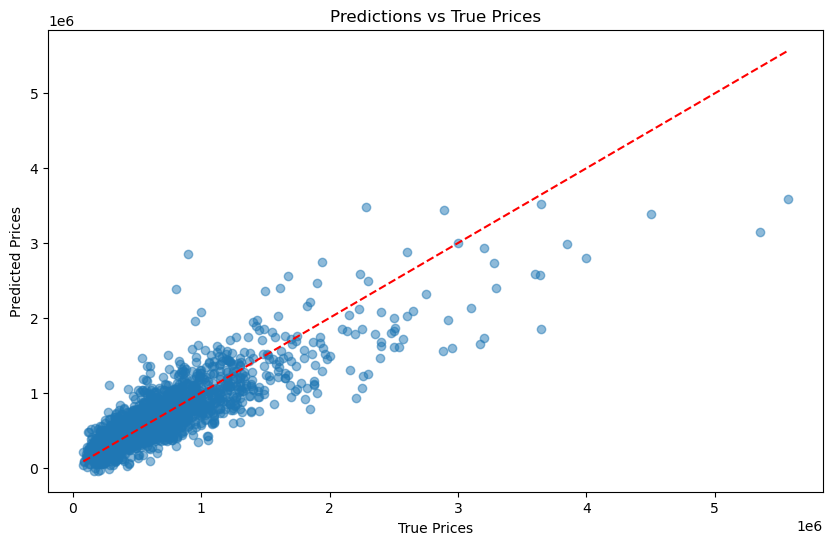

In [94]:
#Scatter Plot: Predictions vs True Values

plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, predictions, alpha=0.5)
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()],
         color='red', linestyle='--')
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.title("Predictions vs True Prices")
plt.show()

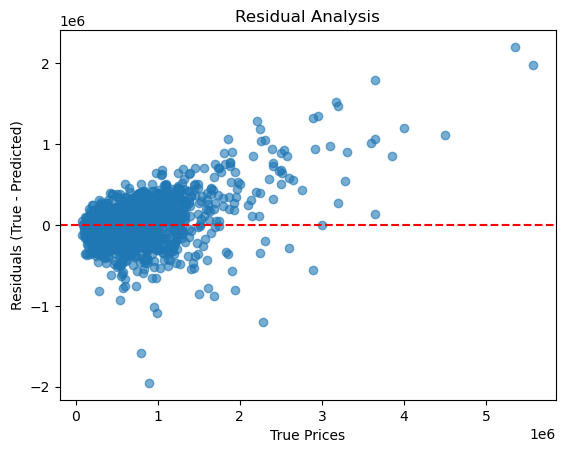

In [95]:
#Residual Plot

residuals = y_test_original - predictions
import matplotlib.pyplot as plt
plt.scatter(y_test_original, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('True Prices')
plt.ylabel('Residuals (True - Predicted)')
plt.title('Residual Analysis')
plt.show()

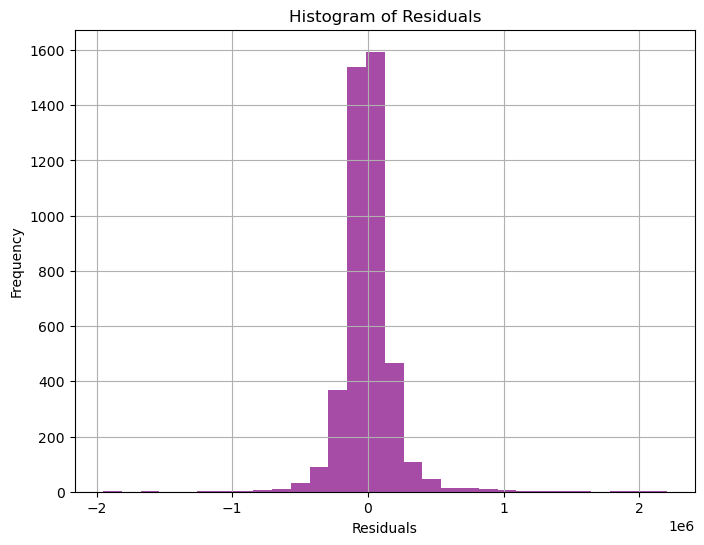

In [96]:
#Histogram of Residuals

plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, color="purple", alpha=0.7)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid()
plt.show()

# Softmax Layer (Classification NN)

Since this is a regression task, softmax is not strictly needed. In regression tasks, the goal is to predict a continuous value, Softmax, however, converts output values into probabilities, which is only meaningful in classification problems.

However, here is a standalone implementation of the softmax function and how it integrates into a classification version of this neural network:

In [ ]:

def softmax(Z):
    """
    Compute the softmax activation function.

    Parameters:
    Z -- Logits (raw scores), shape (n_classes, m), where
         n_classes is the number of output classes, and m is the number of examples.

    Returns:
    softmax_probs -- Softmax probabilities, shape (n_classes, m)
    """
    # Subtract the maximum for numerical stability
    Z_stable = Z - np.max(Z, axis=1, keepdims=True)
    exp_Z = np.exp(Z_stable)
    softmax_probs = exp_Z / np.sum(exp_Z, axis=1, keepdims=True)
    return softmax_probs


class NeuralNetworkWithSoftmax:
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size, dropout_rate=0.5):
        """
        A Neural Network for Classification with Softmax.
        
        Parameters:
        - input_size: Number of input features.
        - hidden_size1: Number of neurons in the first hidden layer.
        - hidden_size2: Number of neurons in the second hidden layer.
        - output_size: Number of output classes.
        - dropout_rate: Probability of dropping a neuron during training.
        """
        # Initialize weights and biases
        self.W1 = np.random.randn(input_size, hidden_size1) * np.sqrt(2. / input_size)
        self.b1 = np.zeros((1, hidden_size1))
        self.W2 = np.random.randn(hidden_size1, hidden_size2) * np.sqrt(2. / hidden_size1)
        self.b2 = np.zeros((1, hidden_size2))
        self.W3 = np.random.randn(hidden_size2, output_size) * np.sqrt(2. / hidden_size2)
        self.b3 = np.zeros((1, output_size))
        
        self.dropout_rate = dropout_rate
        self.learning_rate = 0.01

    def relu(self, Z):
        return np.maximum(0, Z)

    def relu_derivative(self, Z):
        return (Z > 0).astype(float)

    def forward(self, X, training=True):
        # First hidden layer
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = self.relu(self.Z1)
        if training:
            self.A1 *= (np.random.rand(*self.A1.shape) > self.dropout_rate)
            self.A1 /= (1 - self.dropout_rate)

        # Second hidden layer
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = self.relu(self.Z2)
        if training:
            self.A2 *= (np.random.rand(*self.A2.shape) > self.dropout_rate)
            self.A2 /= (1 - self.dropout_rate)

        # Output layer
        self.Z3 = np.dot(self.A2, self.W3) + self.b3
        self.A3 = softmax(self.Z3)  # Apply softmax to get probabilities
        return self.A3

    def backward(self, X, y):
        m = X.shape[0]

        # Convert y to one-hot encoding
        y_onehot = np.zeros_like(self.A3)
        y_onehot[np.arange(m), y] = 1

        # Gradients for softmax and cross-entropy loss
        dZ3 = self.A3 - y_onehot
        dW3 = np.dot(self.A2.T, dZ3) / m
        db3 = np.sum(dZ3, axis=0, keepdims=True) / m

        # Gradients for second hidden layer
        dA2 = np.dot(dZ3, self.W3.T)
        dZ2 = dA2 * self.relu_derivative(self.Z2)
        dW2 = np.dot(self.A1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m

        # Gradients for first hidden layer
        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * self.relu_derivative(self.Z1)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        # Update weights and biases
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
        self.W3 -= self.learning_rate * dW3
        self.b3 -= self.learning_rate * db3

    def train(self, X, y, epochs=100):
        for epoch in range(epochs):
            self.forward(X, training=True)
            self.backward(X, y)
            if epoch % 10 == 0:
                # Compute cross-entropy loss
                loss = -np.sum(np.log(self.A3[np.arange(y.shape[0]), y])) / y.shape[0]
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

    def predict(self, X):
        probs = self.forward(X, training=False)
        return np.argmax(probs, axis=1)


# Dropout

In [98]:
# Define the dropout layer function
def dropout(X, dropout_rate, training=True):
    if training:
        mask = np.random.rand(*X.shape) < (1 - dropout_rate)
        X = X * mask / (1 - dropout_rate)
    return X

# Updated Neural Network class with dropout
class NeuralNetworkWithDropout:
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size=1, dropout_rate=0.3):
        self.W1 = np.random.randn(input_size, hidden_size1) * np.sqrt(2. / input_size)
        self.b1 = np.zeros((1, hidden_size1))
        
        self.W2 = np.random.randn(hidden_size1, hidden_size2) * np.sqrt(2. / hidden_size1)
        self.b2 = np.zeros((1, hidden_size2))
        
        self.W3 = np.random.randn(hidden_size2, output_size) * np.sqrt(2. / hidden_size2)
        self.b3 = np.zeros((1, output_size))

        self.optimizer = AdamOptimizer(learning_rate=0.001)
        self.dropout_rate = dropout_rate  # The dropout rate (e.g., 0.3 means 30% of neurons will be dropped)

    def forward(self, X, training=True):
        # First hidden layer
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = relu(self.Z1)
        self.A1 = dropout(self.A1, self.dropout_rate, training)

        # Second hidden layer
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = relu(self.Z2)
        self.A2 = dropout(self.A2, self.dropout_rate, training)

        # Output layer
        self.Z3 = np.dot(self.A2, self.W3) + self.b3
        self.A3 = self.Z3  # Linear output for regression
        return self.A3

    def backward(self, X, y, lambda_reg=0.01):
        m = X.shape[0]

        # Compute gradients for output layer
        dZ3 = self.A3 - y
        dW3 = np.dot(self.A2.T, dZ3) / m
        db3 = np.sum(dZ3, axis=0, keepdims=True) / m
        
        # Compute gradients for second hidden layer
        dA2 = np.dot(dZ3, self.W3.T)
        dZ2 = dA2 * relu_derivative(self.Z2)
        dW2 = np.dot(self.A1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m
        
        # Compute gradients for first hidden layer
        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * relu_derivative(self.Z1)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        # Apply L2 regularization
        grads = {
            'W1': dW1 + lambda_reg * self.W1,
            'W2': dW2 + lambda_reg * self.W2,
            'W3': dW3 + lambda_reg * self.W3,
            'b1': db1,
            'b2': db2,
            'b3': db3
        }
        
        # Update parameters
        params = {
            'W1': self.W1,
            'W2': self.W2,
            'W3': self.W3,
            'b1': self.b1,
            'b2': self.b2,
            'b3': self.b3
        }
        
        self.optimizer.update(grads, params)

        # Update model parameters
        self.W1 = params['W1']
        self.W2 = params['W2']
        self.W3 = params['W3']
        self.b1 = params['b1']
        self.b2 = params['b2']
        self.b3 = params['b3']

    def train(self, X, y, epochs=500):
        for epoch in range(epochs):
            self.forward(X, training=True)  
            self.backward(X, y)
            if epoch % 10 == 0:
                loss = mse_loss(self.A3, y)
                print(f"Epoch {epoch}, Loss: {loss}")

# Initialize and train the neural network with dropout
nn_dropout = NeuralNetworkWithDropout(input_size=X_train.shape[1], hidden_size1=128, hidden_size2=64, output_size=1, dropout_rate=0.5)
nn_dropout.train(X_train, y_train, epochs=100)

predictions = y_scaler.inverse_transform(predictions_scaled)
y_test_original = y_scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate
mse = np.mean((predictions - y_test_original)**2)
rmse = np.sqrt(mse)
print(f"\nTest MSE: {mse}")
print(f"Test RMSE: {rmse}")

Epoch 0, Loss: 23.392469728950687
Epoch 10, Loss: 8.271357053557349
Epoch 20, Loss: 7.160510674161807
Epoch 30, Loss: 5.776590771973417
Epoch 40, Loss: 4.886732350496604
Epoch 50, Loss: 4.541470058672152
Epoch 60, Loss: 4.258051768406748
Epoch 70, Loss: 3.6706345803002356
Epoch 80, Loss: 3.5672912410538427
Epoch 90, Loss: 3.276566694902223

Test MSE: 37011165970.024376
Test RMSE: 192382.86298426992


# Optimizer 

1. Stochastic Gradient Descent (SGD) the weights are updated directly in the direction of the negative gradient of the loss function:
𝑊
=
𝑊
−
learning rate
×
∇
𝐿
W=W−learning rate×∇L
where 
∇
𝐿
∇L is the gradient of the loss function with respect to the weights.
2. SGD with Momentum helps accelerate gradient descent by considering past gradients. Instead of updating weights solely based on the current gradient, it uses an exponentially decaying average of past gradients:
v 
t
​
 =βv 
t−1
​
 +(1−β)∇L, 
𝑊
=
𝑊
−
learning rate
×
𝑣
𝑡, 
where:
𝑣
𝑡
v 
t
​
  is the velocity (exponentially weighted moving average of the past gradients),
𝛽
β is the momentum factor (usually set around 0.9).

In [2]:
# SGD Optimizer
class SGD:
    def __init__(self, learning_rate=0.01):
        self.learning_rate = learning_rate

    def update(self, grads, params):
        for key in params:
            params[key] -= self.learning_rate * grads[key]

# SGD with Momentum Optimizer
class SGDWithMomentum:
    def __init__(self, learning_rate=0.01, momentum=0.9):
        self.learning_rate = learning_rate
        self.momentum = momentum
        self.velocity = None
    
    def update(self, grads, params):
        if self.velocity is None:
            self.velocity = {key: np.zeros_like(val) for key, val in params.items()}
        
        for key in params:
            self.velocity[key] = self.momentum * self.velocity[key] + self.learning_rate * grads[key]
            
            params[key] -= self.velocity[key]


# Fully Parametrizable Neural Network class + Optimizer 

Epoch 0, Loss: 0.9692328150654523
Epoch 10, Loss: 0.9692318104120085
Epoch 20, Loss: 0.9692308062249921
Epoch 30, Loss: 0.9692298020147466
Epoch 40, Loss: 0.9692287981472789
Epoch 50, Loss: 0.9692277944043932
Epoch 60, Loss: 0.9692267908469391
Epoch 70, Loss: 0.9692257875664178
Epoch 80, Loss: 0.9692247847812866
Epoch 90, Loss: 0.9692237822156491


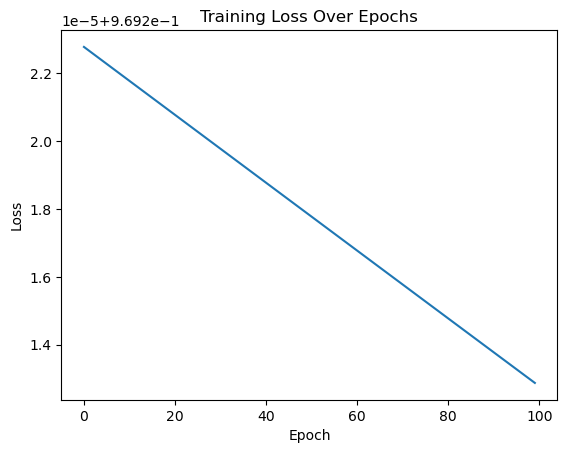

In [100]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x) ** 2

def softmax(x):
    exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))  # Numerical stability
    return exp_values / np.sum(exp_values, axis=1, keepdims=True)

# Dropout Layer
def dropout(X, dropout_rate, training=True):
    if training:
        mask = np.random.rand(*X.shape) < (1 - dropout_rate)
        X = X * mask / (1 - dropout_rate)
    return X

# L2 Regularization (Weight Decay)
def l2_regularization(weights, lambda_reg):
    return lambda_reg * np.sum(np.square(weights))

# Adam Optimizer
'''class AdamOptimizer:
    def __init__(self, learning_rate=0.0001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = None
        self.v = None
        self.t = 0
    
    def update(self, grads, params):
        self.t += 1
        if self.m is None:
            self.m = {key: np.zeros_like(val) for key, val in params.items()}
            self.v = {key: np.zeros_like(val) for key, val in params.items()}
        
        for key in params:
            self.m[key] = self.beta1 * self.m[key] + (1 - self.beta1) * grads[key]
            self.v[key] = self.beta2 * self.v[key] + (1 - self.beta2) * grads[key]**2
            
            m_hat = self.m[key] / (1 - self.beta1**self.t)
            v_hat = self.v[key] / (1 - self.beta2**self.t)
            
            # Gradient clipping
            max_grad = 1.0
            m_hat = np.clip(m_hat, -max_grad, max_grad)
            v_hat = np.clip(v_hat, -max_grad, max_grad)
            
            params[key] -= self.learning_rate * m_hat / (np.sqrt(v_hat) + self.epsilon)'''


# Neural Network Class
class FullyParametrizableNN:
    def __init__(self, input_size, hidden_layers, activations, dropout_rate=0.3, lambda_reg=0.01):
        # Ensure the activations list matches the number of hidden layers
        if len(activations) != len(hidden_layers):
            raise ValueError("The number of activation functions must match the number of hidden layers.")
        
        self.layers = [input_size] + hidden_layers + [1]  # Define the architecture (input, hidden, output)
        self.activations = activations  # List of activation functions
        self.dropout_rate = dropout_rate
        self.lambda_reg = lambda_reg
        
        # Weight initialization (scale by 10 to prevent overflow)
        self.W = []
        self.b = []
        for i in range(len(self.layers) - 1):
            self.W.append(np.random.randn(self.layers[i], self.layers[i+1]) * np.sqrt(2. / self.layers[i]) / 10)
            self.b.append(np.zeros((1, self.layers[i+1])))
        
        # Adam optimizer
        self.optimizer = SGD(learning_rate=0.0001)
    
    def forward(self, X, training=True):
        self.A = [X]  # First layer input is the input X
        self.Z = []
        
        for i in range(len(self.layers) - 1):
            Z = np.dot(self.A[-1], self.W[i]) + self.b[i]
            self.Z.append(Z)
            
            # Apply activation function for hidden layers only
            if i < len(self.layers) - 2:  # Skip the output layer
                if self.activations[i] == 'relu':
                    A = relu(Z)
                elif self.activations[i] == 'sigmoid':
                    A = sigmoid(Z)
                elif self.activations[i] == 'tanh':
                    A = tanh(Z)
                self.A.append(A)
                
                # Apply dropout if training
                if training:
                    A = dropout(A, self.dropout_rate, training)
            else:
                # No activation function for the output layer (regression)
                self.A.append(Z)
    
    def backward(self, X, y, learning_rate=0.0001, lambda_reg=0.01):
        m = X.shape[0]
        
        # Compute gradients for each layer
        dZ = self.A[-1] - y
        grads = {'W' + str(len(self.layers)-2): np.dot(self.A[-2].T, dZ) / m, 
                 'b' + str(len(self.layers)-2): np.sum(dZ, axis=0, keepdims=True) / m}
        
        # Loop backward through layers
        for i in range(len(self.layers) - 3, -1, -1):
            dA = np.dot(dZ, self.W[i+1].T)
            if self.activations[i] == 'relu':
                dZ = dA * relu_derivative(self.Z[i])
            elif self.activations[i] == 'sigmoid':
                dZ = dA * sigmoid_derivative(self.Z[i])
            elif self.activations[i] == 'tanh':
                dZ = dA * tanh_derivative(self.Z[i])
            
            grads['W' + str(i)] = np.dot(self.A[i].T, dZ) / m
            grads['b' + str(i)] = np.sum(dZ, axis=0, keepdims=True) / m
        
        # Apply L2 regularization
        for key in grads:
            if 'W' in key:
                layer_idx = int(key[1:])
                grads[key] += lambda_reg * self.W[layer_idx]
        
        # Gradient Clipping
        max_grad = 1.0
        for key in grads:
            grads[key] = np.clip(grads[key], -max_grad, max_grad)

        params = {f"W{i}": self.W[i] for i in range(len(self.W))}
        params.update({f"b{i}": self.b[i] for i in range(len(self.b))})    
        
        # Update parameters
        self.optimizer.update(grads, params)

        for i in range(len(self.W)):
            self.W[i] = params[f"W{i}"]
            self.b[i] = params[f"b{i}"]
    
    def train(self, X, y, epochs=500):
        for epoch in range(epochs):
            self.forward(X, training=True)  
            self.backward(X, y)
            
            # Calculate and check for NaN loss
            loss = np.mean((self.A[-1] - y) ** 2)
            if np.isnan(loss):
                print("Loss is NaN, check forward and backward pass")
                break  # Stop training if NaN loss
            
            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Loss: {loss}")

                
# Example usage
input_size = X_train.shape[1]
hidden_layers = [64, 32]
activations = ['relu', 'relu']
dropout_rate = 0.3
lambda_reg = 0.01

nn = FullyParametrizableNN(input_size, hidden_layers, activations, dropout_rate, lambda_reg)
nn.train(X_train, y_train, epochs=100)

epochs = 100
losses = []
for epoch in range(epochs):
    nn.forward(X_train, training=True)  
    nn.backward(X_train, y_train)
    loss = np.mean((nn.A[-1] - y_train) ** 2)
    losses.append(loss)

plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.show()

# Evaluate Different Neural Network Architectures/Parameters

In [101]:

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape) 
print(X_val.shape, y_val.shape) 

architectures = [
    ([64], 'single hidden layer, 64 units'),
    ([128, 64], 'two hidden layers, 128 and 64 units'),
    ([256, 128, 64], 'three hidden layers, 256, 128, and 64 units')
]

optimizers = [
    ('SGD', SGD(learning_rate=0.01)),
    ('SGD with Momentum', SGDWithMomentum(learning_rate=0.01, momentum=0.9))
]

regularizations = [
    ('Dropout 0.2', 0.2, None),  # Dropout rate of 0.2
    ('Dropout 0.5', 0.5, None),  # Dropout rate of 0.5
    ('L2 Regularization', None, 0.01)  # L2 regularization with lambda = 0.01
]

hyperparameters = [
    ('Learning Rate 0.001', 0.001, 32),
    ('Learning Rate 0.01', 0.01, 64),
    ('Learning Rate 0.1', 0.1, 128)
]

def train_and_evaluate_model(X_train, y_train, X_val, y_val, architecture, optimizer, regularization, hyperparameters, epochs=100):
    input_size = X_train.shape[1]
    hidden_layers = architecture[0]
    activations = ['relu'] * len(hidden_layers)  # ReLU activation for hidden layers
    
    # Regularization setup
    dropout_rate = regularization[1] if regularization[0].startswith('Dropout') else 0.3
    lambda_reg = regularization[2] if regularization[0].startswith('L2') else 0.01
    
    # Initialize the neural network
    nn = FullyParametrizableNN(input_size, hidden_layers, activations, dropout_rate=dropout_rate, lambda_reg=lambda_reg)
    
    # Set the optimizer
    nn.optimizer = optimizer[1]
    
    # Hyperparameters
    learning_rate = hyperparameters[1]
    batch_size = hyperparameters[2]
    
    # Track loss
    training_losses = []
    validation_losses = []
    
    for epoch in range(epochs):
        nn.train(X_train, y_train, epochs=1, batch_size=batch_size)
        
        # Calculate training loss
        train_loss = np.mean((nn.A[-1] - y_train) ** 2)
        training_losses.append(train_loss)
        
        # Calculate validation loss
        nn.forward(X_val, training=False)
        val_loss = np.mean((nn.A[-1] - y_val) ** 2)
        validation_losses.append(val_loss)
        
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Training Loss: {train_loss}, Validation Loss: {val_loss}")
    
    # Plot the loss curves
    plt.plot(range(epochs), training_losses, label="Training Loss")
    plt.plot(range(epochs), validation_losses, label="Validation Loss")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f"Model: {architecture[1]}, Optimizer: {optimizer[0]}, Regularization: {regularization[0]}, LR: {learning_rate}")
    plt.legend()
    plt.show()

# Example usage for different experiments
for architecture in architectures:
    for optimizer in optimizers:
        for regularization in regularizations:
            for hyperparameter in hyperparameters:
                train_and_evaluate_model(X_train, y_train, X_val, y_val, architecture, optimizer, regularization, hyperparameter, epochs=100)


(17290, 18) (17290,)
(4323, 18) (4323,)


TypeError: FullyParametrizableNN.train() got an unexpected keyword argument 'batch_size'